<a href="https://colab.research.google.com/github/AbouCamara/IA-FORCE-N/blob/main/Pr%C3%A9diction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import des librairies dont nous aurons  besoins
from google.colab import files
import pandas as pd
import numpy as np
import re

In [2]:
# Télécharger le fichier CSV
uploaded = files.upload()

Saving laptop_data.csv to laptop_data.csv


In [4]:
# Lire le fichier CSV
# Récupérer le nom du fichier téléchargé
filename = next(iter(uploaded))
df = pd.read_csv('laptop_data.csv')

# Afficher les premières lignes du DataFrame
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [6]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
df.dtypes

,0
Unnamed: 0,int64
Company,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object
OpSys,object


In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1298,False
1299,False
1300,False
1301,False


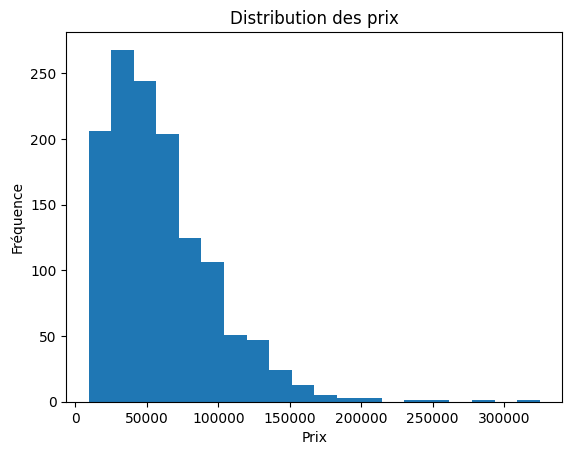

In [9]:
# importer la bibliothèque matplotlib
import matplotlib.pyplot as plt

# Visualiser la distribution des prix avec un histogramme
df['Price'].plot(kind='hist', bins=20, title='Distribution des prix')
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

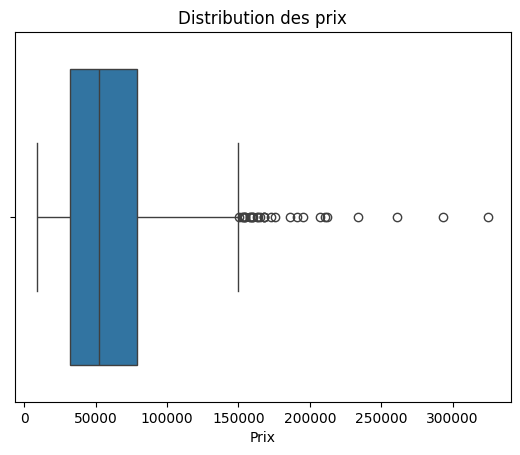

In [10]:
# importer la bibliothèque seaborn
import seaborn as sns

# Visualiser la distribution des prix avec un boxplot
sns.boxplot(x=df['Price'])
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.show()

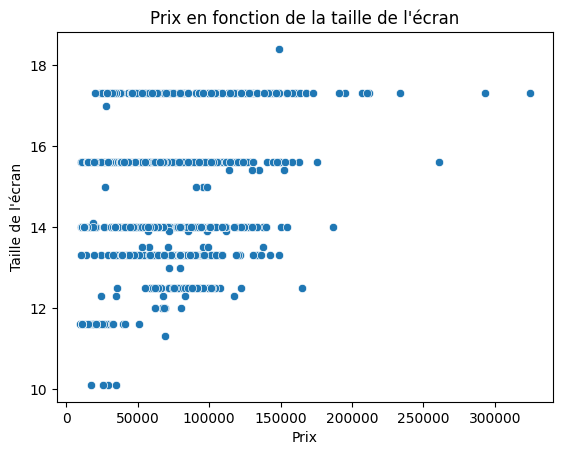

In [14]:
# Scatter plot entre le prix et une caractéristique numérique (par exemple, la taille)
sns.scatterplot(x=df['Price'], y=df['Inches'], data=df)
plt.title('Prix en fonction de la taille de l\'écran')
plt.xlabel('Prix')
plt.ylabel('Taille de l\'écran')
plt.show()

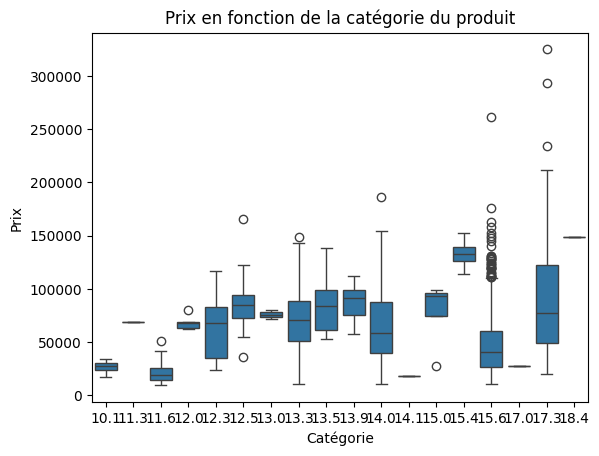

In [22]:
# Boxplot pour voir la relation entre une variable catégorielle (par exemple, la catégorie du produit) et le prix
sns.boxplot(x=df['Inches'], y=df['Price'], data=df)
plt.title('Prix en fonction de la catégorie du produit')
plt.xlabel('Catégorie')
plt.ylabel('Prix')
plt.show()

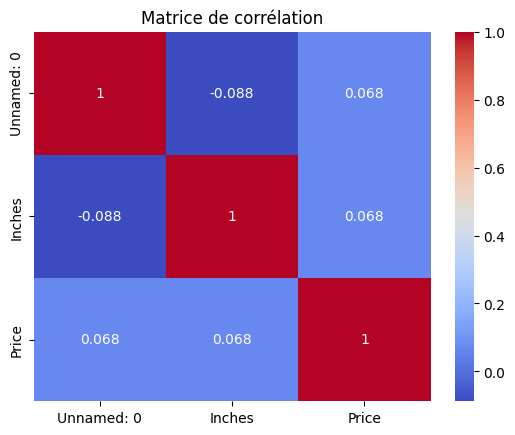

In [28]:
# Calcul de la corrélation avec les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

# Visualisation de la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [30]:
# importer la bibliotéque scipy

# Exemple d'ANOVA pour tester la relation entre catégorie et prix
from scipy.stats import f_oneway
f_value, p_value = f_oneway(df[df['TypeName'] == 'Business']['Price'], df[df['TypeName'] == 'Ultrabook']['Price'])
print(f"F-value: {f_value}, p-value: {p_value}")

F-value: nan, p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [32]:
# Afficher la corrélation du prix avec les autres variables numériques
corr_matrix = df_numeric.corr()
corr_matrix['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Inches,0.068197
Unnamed: 0,0.067984
